<a href="https://colab.research.google.com/github/Shan-Lee2k/Image-Processing-and-Computer-Vision/blob/main/Gradient_Domain_Editing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.worldatlas.com/r/w1300/upload/7d/db/c3/shutterstock-1558058690.jpg
!wget https://media.loveitopcdn.com/3807/co-viet-nam-qua-cac-thoi-ky-3.jpg
!wget https://raw.githubusercontent.com/bigvisionai/opencv-webinar-poisson-image-editing/main/trump.jpg
!wget https://image-1.uhdpaper.com/wallpaper/kung-fu-panda-4-po-hd-wallpaper-uhdpaper.com-454@1@n.jpg

Shape of background image: (920, 1430, 3)
Shape of source image: (360, 640, 3)


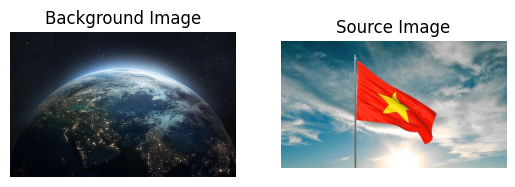

In [23]:
bg = cv2.imread("/content/shutterstock-1558058690.jpg")
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
print(f"Shape of background image: {bg.shape}")
src = cv2.imread("/content/co-viet-nam-qua-cac-thoi-ky-3.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
print(f"Shape of source image: {src.shape}")
plt.subplot(121)
plt.imshow(bg)
plt.axis("off")
plt.title("Background Image")
plt.subplot(122)
plt.imshow(src)
plt.title("Source Image")
plt.axis("off")
plt.imshow(src)

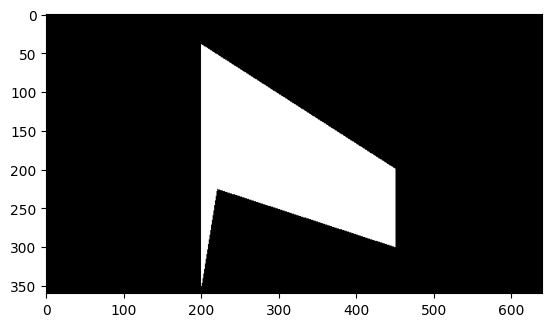

In [31]:
# Create mask
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([[200,40],[450,200], [450,300],[220,225], [200,350]] ,np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))
plt.imshow(src_mask)
center = (900,250)
# Clone seamlessly
flags = ["NORMAL_CLONE", "MIXED_CLONE"]

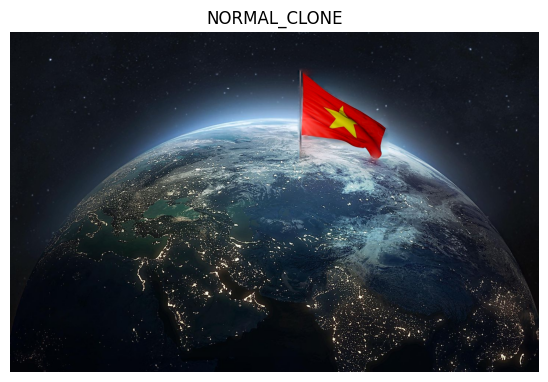

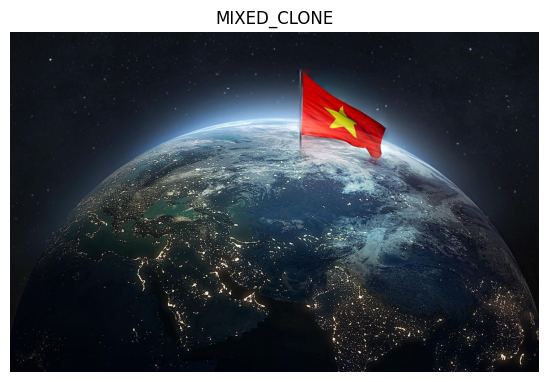

In [33]:
for i,flag in enumerate(flags):
    out_img = cv2.seamlessClone(src, bg, src_mask, center, i+1)
    plt.figure(figsize=(15,15))
    plt.subplot(int("12"+str(i+1)))
    plt.imshow(out_img)
    plt.axis("off")
    plt.title(flag)
plt.show()

# FACE BLENDING



(573, 450, 3)
(573, 500, 3)


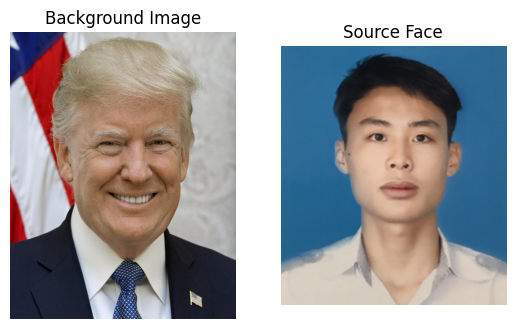

In [41]:
bg_face = cv2.imread("/content/trump.jpg")
bg_face = cv2.cvtColor(bg_face, cv2.COLOR_BGR2RGB)
bg_face = cv2.resize(bg_face,dsize=None, fx = 0.9, fy = 1)
print(bg_face.shape)
main_face = cv2.imread("/content/ShanGB.jpg")
main_face = cv2.cvtColor(main_face, cv2.COLOR_BGR2RGB)
main_face = cv2.resize(main_face, dsize = (500,573))
print(main_face.shape)
plt.subplot(121)
plt.imshow(bg_face)
plt.title("Background Image")
plt.axis("off")
plt.subplot(122)
plt.imshow(main_face)
plt.title("Source Face")
plt.axis("off")
plt.show()

(450, 573, 3)


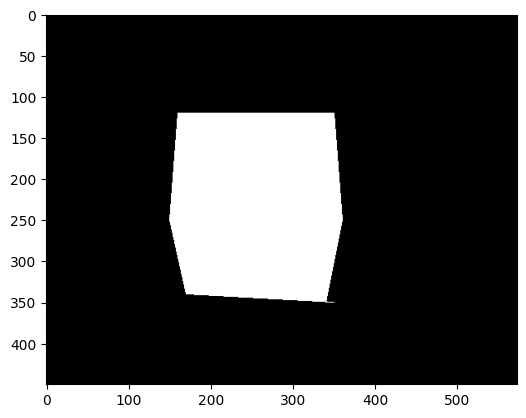

In [37]:
# Create face mask
center_point = (240,260)
face_mask = np.zeros(bg_face.shape, bg_face.dtype)

poly = np.array([[160,120],[350,120],[360,250],[340,350],[350,350],[170,340],[150,250]],np.int32)
face_mask = cv2.resize(face_mask, dsize = (bg_face.shape[0],bg_face.shape[1]))
cv2.fillPoly(face_mask, [poly], (255, 255, 255))
print(face_mask.shape)
plt.imshow(face_mask)

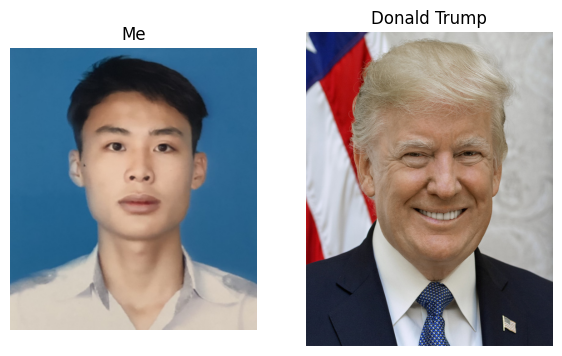

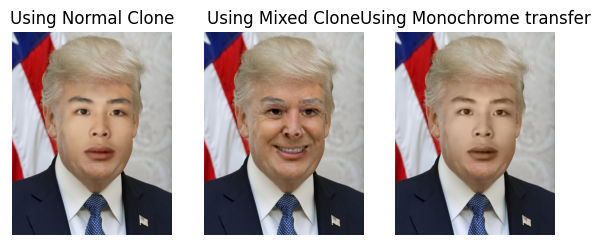

In [43]:
# Clone seamlessly.
output_normal_clone = cv2.seamlessClone(main_face, bg_face, face_mask, center_point, cv2.NORMAL_CLONE)
output_mixed_clone = cv2.seamlessClone(main_face, bg_face, face_mask, center_point, cv2.MIXED_CLONE)
output_monochorme = cv2.seamlessClone(main_face, bg_face, face_mask, center_point, cv2.MONOCHROME_TRANSFER)
plt.figure(figsize=(7,7))
plt.subplot(121); plt.imshow(main_face); plt.title("Me");plt.axis('off');
plt.subplot(122); plt.imshow(bg_face);  plt.title("Donald Trump");plt.axis('off');
plt.figure(figsize=(7,7))
plt.subplot(131); plt.imshow(output_normal_clone); plt.title("Using Normal Clone");plt.axis('off');
plt.subplot(132); plt.imshow(output_mixed_clone);  plt.title("Using Mixed Clone");plt.axis('off');
plt.subplot(133); plt.imshow(output_monochorme);  plt.title("Using Monochrome transfer");plt.axis('off');